NAME: ABRAR AHAMED I
USN: 1SV21CS005
TEAM: 05


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/ML_TEAM5/1SV21CS005/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/ML_TEAM5/1SV21CS005/Fake.csv")

In [ ]:
data_true.shape,data_fake.shape

((21417, 4), (23481, 4))

In [ ]:
data_true['label'] = 1
data_fake['label'] = 0

In [ ]:
data_true_manual_testing = data_true.tail(10)
data_true = data_true.iloc[:-10]

In [ ]:
data_fake_manual_testing = data_fake.tail(10)
data_fake = data_fake.iloc[:-10]

In [ ]:
data_true_manual_testing=data_true.tail(10)
for i in range(21417,23481,-1):
  data_true.drop([i],axis=0,inplace=True)

data_fake_manual_testing=data_fake.tail(10)
for i in range(21417,23481,-1):
  data_fake.drop([i],axis=0,inplace=True)


In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing,data_true_manual_testing])
data_manual_testing.to_csv("manual_testing.csv")

In [ ]:
data_merge = pd.concat([data_fake,data_true])
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


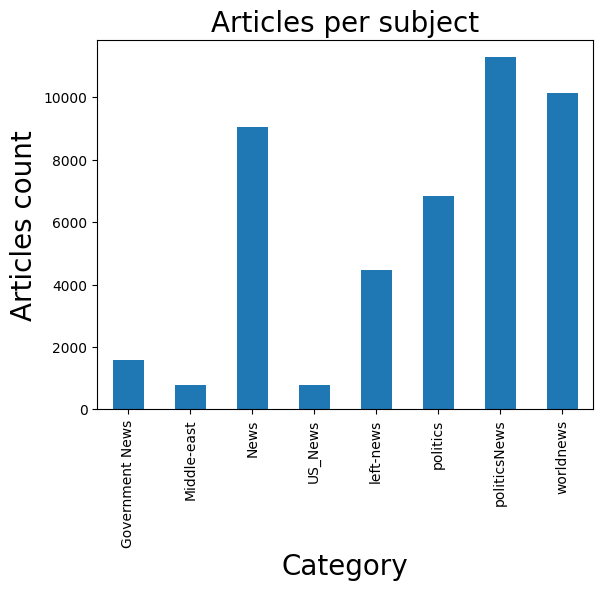

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind='bar')
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Articles count",size=20)
plt.show()

class
0    23481
1    21417
Name: text, dtype: int64
0 = fake news
1 = true news


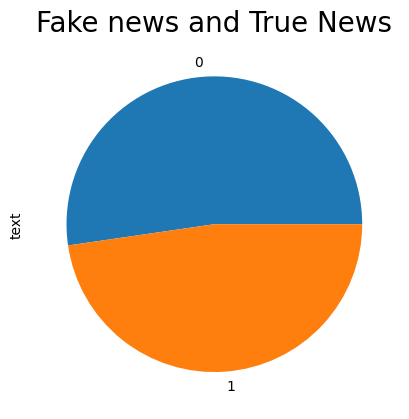

In [ ]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = fake news\n1 = true news")
data_merge.groupby(['class'])['text'].count().plot(kind='pie')
plt.title("Fake news and True News",size=20)
plt.show()

In [ ]:
data = data_merge.drop(["title","subject","date"],axis=1)
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data = data.sample(frac=1)
data.head(10)

,text,class
32185,Wow! CNN host Chris Cuomo tells viewers it s I...,0
31852,NEW YORK (Reuters) - Donald Trump’s presidenti...,1
26789,100% FED Up! was able to easily find evidence ...,0
11278,(Story corrects third paragraph to show Mosul...,1
18282,LONDON (Reuters) - Iran will reopen all its bo...,1
13276,Watch Jill Stein explain why she s working to ...,0
21682,Democrats and a lot of Republicans are scratch...,0
21214,CLEVELAND (Reuters) - Thirteen months after la...,1
12843,WASHINGTON (Reuters) - U.S. President Donald T...,1
29160,"KIRKUK, Iraq (Reuters) - At least 23 people we...",1


In [ ]:
print(data.isnull().sum())

text     0
class    0
dtype: int64


In [ ]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text']=data['text'].apply(filtering)
data.head(10)

,text,class
8342,washington reuters huma abedin one of dem...,1
21752,so am i getting this right everyone needs to ...,0
10628,we love his style secretary of state rex till...,0
15475,seoul reuters ten north koreans including...,1
4511,if you ve spent much time on social media you...,0
15674,,0
19394,honolulu s caf gets rave reviews on yelp ...,0
2512,when alleged president donald trump doesn t li...,0
8403,los angeles reuters democrat hillary clint...,1
17092,washington reuters u s secretary of state...,1


In [ ]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['text'])
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = ttp(x, y, test_size=0.25, random_state=0)

In [ ]:
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
LinR = LinearRegression()
LinR.fit(x_train, y_train)

LinearRegression()

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
user_input = input("Enter the news article text: ")
user_input_transformed = vectorizer.transform([user_input])

Enter the news article text: Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing


In [ ]:
prediction_LR = LR.predict(user_input_transformed)
if prediction_LR == 1:
    print("Logistic Regression: This news article is real.")
else:
    print("Logistic Regression: This news article is fake.")

prediction_DT = DT.predict(user_input_transformed)
if prediction_DT == 1:
    print("Decision Tree: This news article is real.")
else:
    print("Decision Tree: This news article is fake.")

prediction_RF = RF.predict(user_input_transformed)
if prediction_RF == 1:
    print("Random Forest: This news article is real.")
else:
    print("Random Forest: This news article is fake.")

prediction_LinR = LinR.predict(user_input_transformed)

prediction_LinR = np.where(prediction_LinR >= 0.5, 1, 0)
if prediction_LinR == 1:
    print("Linear Regression: This news article is real.")
else:
    print("Linear Regression: This news article is fake.")

prediction_KNN = KNN.predict(user_input_transformed)
if prediction_KNN == 1:
    print("K-Nearest Neighbors: This news article is real.")
else:
    print("K-Nearest Neighbors: This news article is fake.")

Logistic Regression: This news article is fake.
Decision Tree: This news article is fake.
Random Forest: This news article is fake.
Linear Regression: This news article is fake.
K-Nearest Neighbors: This news article is fake.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')